In [1]:
# Bibliotecas usadas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Carregando os dados tratados na semana 1
df_telco_customer = pd.read_csv('https://raw.githubusercontent.com/SilvioCSOliveira/ChallengeDataScience2022AluraVoz/main/df_telco_customer_ajustada.csv',sep=';')
df_telco_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   IdCliente                 7043 non-null   object 
 2   ClienteCancelado          7043 non-null   object 
 3   Genero                    7043 non-null   object 
 4   Maior65                   7043 non-null   object 
 5   Parceiro(a)               7043 non-null   object 
 6   Dependentes               7043 non-null   object 
 7   TempoContrato(m)          7043 non-null   int64  
 8   ServiçoTelefônico         7043 non-null   object 
 9   MultiplasLinhas           7043 non-null   object 
 10  ServicoInternet           7043 non-null   object 
 11  AdicinalSegurancaOnline   7043 non-null   object 
 12  AdicionalBackup           7043 non-null   object 
 13  AdicionalProtDispositivo  7043 non-null   object 
 14  Adiciona

In [3]:
# Analisando 

print("Temos um total de " + str( df_telco_customer['IdCliente'].count()) )
# Temos um total de 7043 clientes da Alura Voz
x = df_telco_customer.query("ClienteCancelado=='Yes'")
print("E deste total " + str(x['IdCliente'].count()) + ' cancelaram sua assinatura.' )


Temos um total de 7043
E deste total 1869 cancelaram sua assinatura.


Agora vou analisar as variáveis qualitativas dos Clientes para tentar encontrar alguma que nos ajude a entender os motivos dos cancelamentos.

Qualitativos:
- Genero                    
- Maior65                   
- Parceiro(a)               
- Dependentes               
- TipoContrato              
- FaturaDigital             
- FormaPagamento            
- ServiçoTelefônico         
	- MultiplasLinhas           
- ServicoInternet           
	- AdicinalSegurancaOnline   
	- AdicionalBackup           
	- AdicionalProtDispositivo  
	- AdicionalSuporte          
- AssinaturaTv              
	- AssinaturaFilmes          

Quantitativos:
- TempoContrato(m)          
- GastoMensal               
- GastoTotal                
- GastoDiarioMedio          



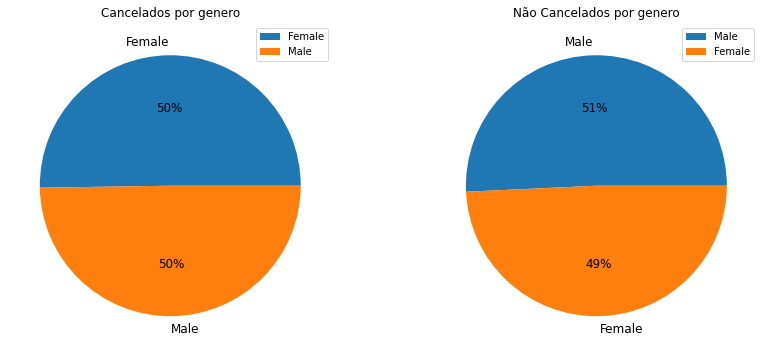

In [4]:
# Analisando os dados Qualitativos, inciando por genero

# Dividir os cancelados e não cancelados em dois dataframes para possibilitar verificar se proporcionalmente há diferença nos dados qualitativos
# entre os Clientes que cancelaram e os que não cancelaram
df_telco_customer_churn = df_telco_customer.query('ClienteCancelado == "Yes"')
df_telco_customer_nao_churn = df_telco_customer.query('ClienteCancelado == "No"')
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn["Genero"].value_counts().values
labels = df_telco_customer_churn["Genero"].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},)  #,colors =["#6a8ee8", "#424ad1"]
plt.title('Cancelados por genero')
plt.legend()


count_nc = df_telco_customer_nao_churn["Genero"].value_counts().values
labels_nc = df_telco_customer_nao_churn["Genero"].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},)  #,colors =["#6a8ee8", "#424ad1"]
plt.title('Não Cancelados por genero')
plt.legend()

Como demonstra o gráfico acima, não há nenhuma diferença percentual significativa que indique alguma correlação no genero com os cancelamentos.

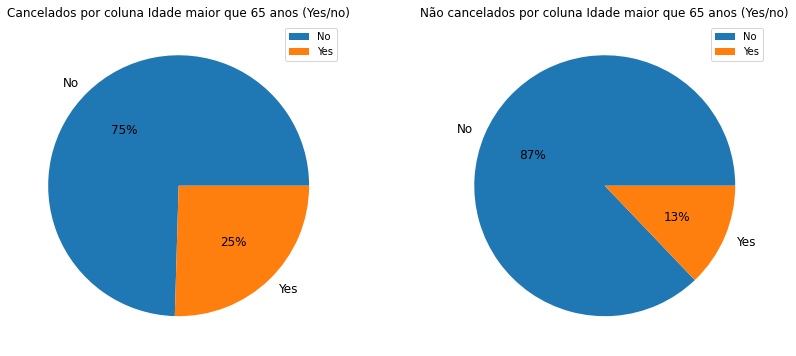

In [5]:
# Analisando os dados Qualitativos coluna Maior65
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn["Maior65"].value_counts().values
labels = df_telco_customer_churn["Maior65"].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por coluna Idade maior que 65 anos (Yes/no)')
plt.legend()

count_nc = df_telco_customer_nao_churn["Maior65"].value_counts().values
labels_nc = df_telco_customer_nao_churn["Maior65"].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não cancelados por coluna Idade maior que 65 anos (Yes/no)')
plt.legend()

Como demonstra o gráfico acima, há um aumento discreto no percentual de Clientes menores que 65 anos e que cancelaram, o que pode indicar uma correlação.

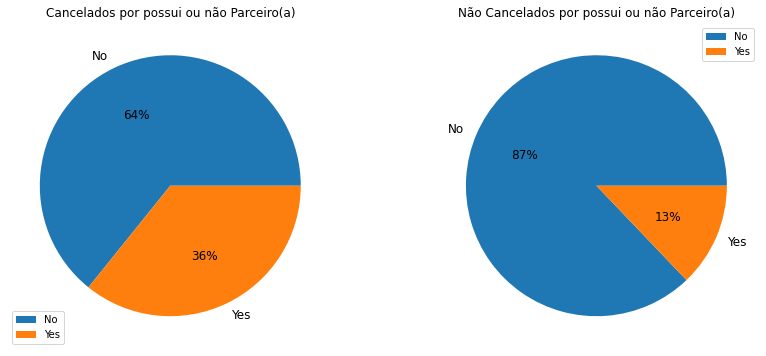

In [6]:
# Analisando os dados Qualitativos, coluna Parceiro(a)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn["Parceiro(a)"].value_counts().values
labels = df_telco_customer_churn["Parceiro(a)"].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por possui ou não Parceiro(a)')
plt.legend()

count_nc = df_telco_customer_nao_churn["Maior65"].value_counts().values
labels_nc = df_telco_customer_nao_churn["Maior65"].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por possui ou não Parceiro(a)')
plt.legend()

Como demonstra o gráfico acima, há diferença percentual significativa entre os clientes que possuem parceiro(a) que cancelaram, **o que indica correlação entre o cancelamento e o cliente possuir parceiro(a)**

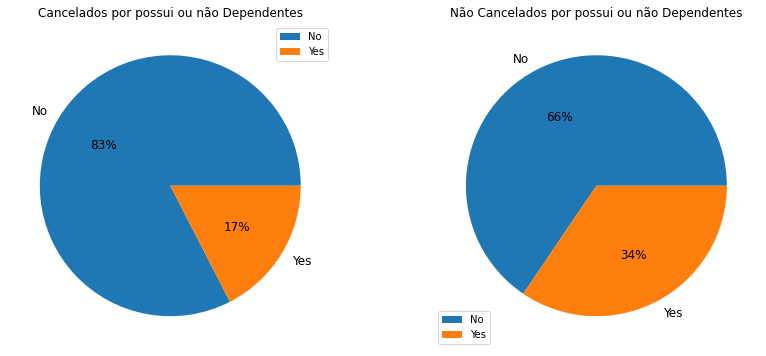

In [7]:
# Analisando os dados Qualitativos, coluna Dependentes (possui ou não)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn["Dependentes"].value_counts().values
labels = df_telco_customer_churn["Dependentes"].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por possui ou não Dependentes')
plt.legend()

count_nc = df_telco_customer_nao_churn["Dependentes"].value_counts().values
labels_nc = df_telco_customer_nao_churn["Dependentes"].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por possui ou não Dependentes')
plt.legend()

Como demonstra o gráfico acima, há diferença percentual significativa entre os clientes que possuem dependentes e que cancelaram, **o que indica correlação entre o cancelamento e o cliente possuir dependetes**

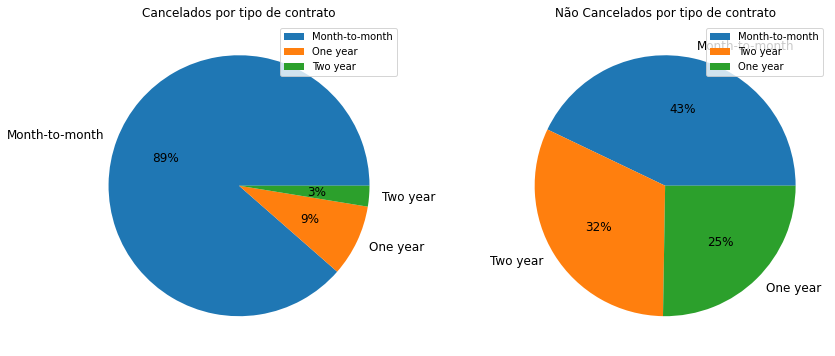

In [8]:
campo = 'TipoContrato'
# Analisando os dados Qualitativos, coluna Dependentes (possui ou não)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por tipo de contrato')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por tipo de contrato')
plt.legend()

incluir Explicação

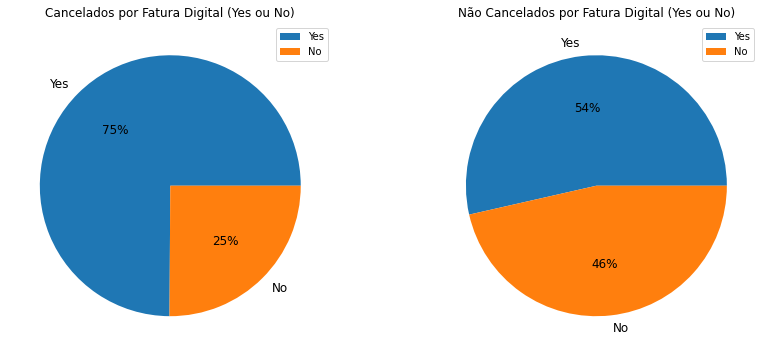

In [9]:
campo = 'FaturaDigital'
# Analisando os dados Qualitativos, coluna Fatura digital (Yes ou No)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Fatura Digital (Yes ou No)')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Fatura Digital (Yes ou No)')
plt.legend()

incluir explicação não correlação

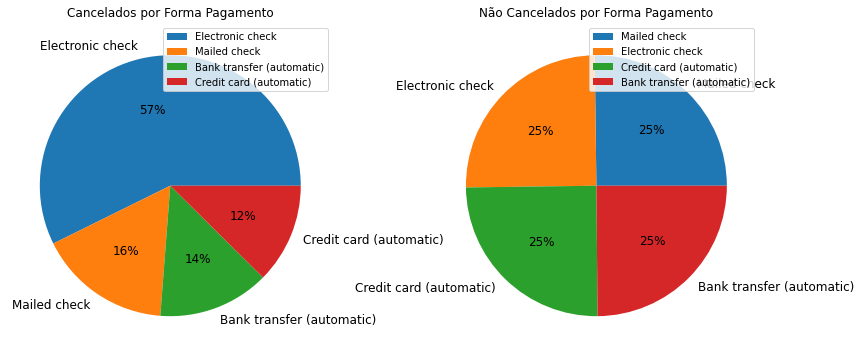

In [10]:
campo = 'FormaPagamento'
# Analisando os dados Qualitativos, coluna Forma Pagamento 
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Forma Pagamento')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Forma Pagamento')
plt.legend()

Incluir explicação

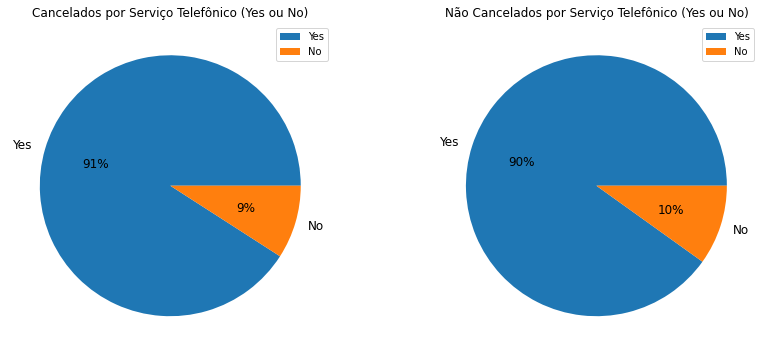

In [11]:
campo = 'ServiçoTelefônico'
# Analisando os dados Qualitativos, coluna Serviço Telefônico (Yes ou no)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Serviço Telefônico (Yes ou No)')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Serviço Telefônico (Yes ou No)')
plt.legend()

Como demonstra o gráfico acima, não há nenhuma diferença percentual significativa que indique alguma correlação entre o cancelamento dos Clientes possuirem ou não serviço telefônico.

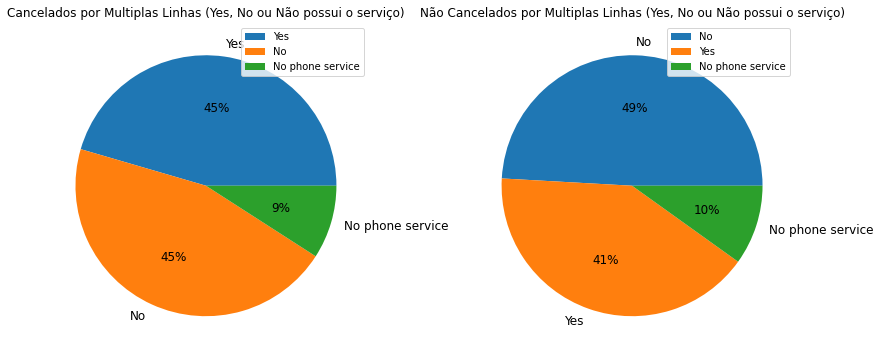

In [12]:
campo = 'MultiplasLinhas'
# Analisando os dados Qualitativos, coluna Multiplas Linhas (Yes, No ou Não possui o serviço))
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Multiplas Linhas (Yes, No ou Não possui o serviço)')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Multiplas Linhas (Yes, No ou Não possui o serviço)')
plt.legend()

Como demonstra o gráfico acima, não há nenhuma diferença percentual significativa que indique alguma correlação entre o cancelamento dos Clientes possuirem ou multiplas linhas.

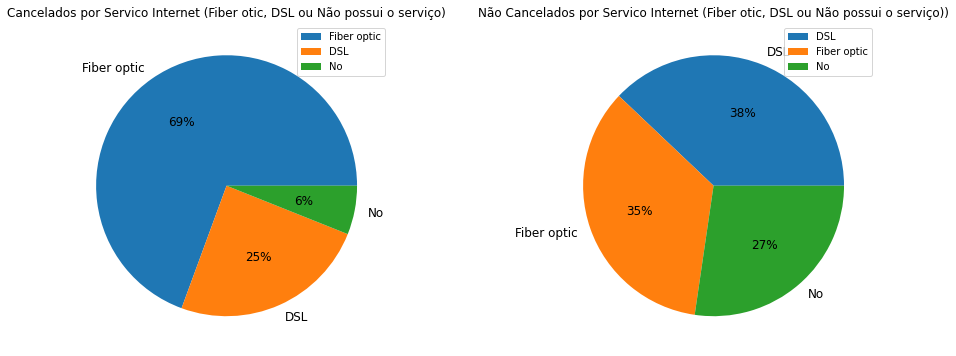

In [13]:
campo = 'ServicoInternet'
# Analisando os dados Qualitativos, coluna Servico Internet (Fiber otic, DSL ou Não possui o serviço))
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Servico Internet (Fiber otic, DSL ou Não possui o serviço)')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Servico Internet (Fiber otic, DSL ou Não possui o serviço))')
plt.legend()

Explicação

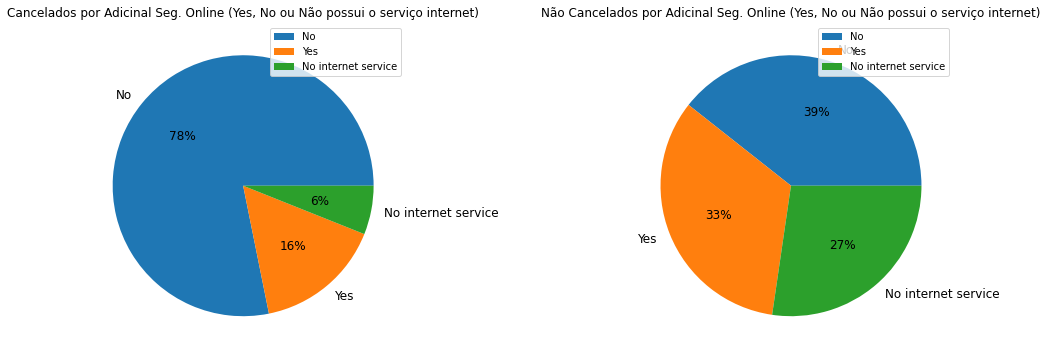

In [14]:
campo = 'AdicinalSegurancaOnline'
# Analisando os dados Qualitativos, coluna Adicinal SegurancaOnline (Yes, No ou Não possui o serviço internet))
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Adicinal Seg. Online (Yes, No ou Não possui o serviço internet)')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Adicinal Seg. Online (Yes, No ou Não possui o serviço internet)')
plt.legend()

explicação

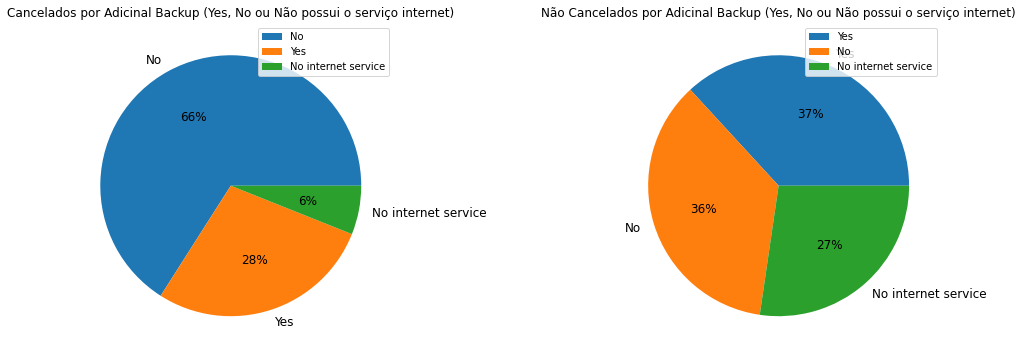

In [15]:
campo = 'AdicionalBackup'
# Analisando os dados Qualitativos, coluna Adicinal Backup (Yes, No ou Não possui o serviço internet))
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Adicinal Backup (Yes, No ou Não possui o serviço internet)')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Adicinal Backup (Yes, No ou Não possui o serviço internet)')
plt.legend()

Explicação

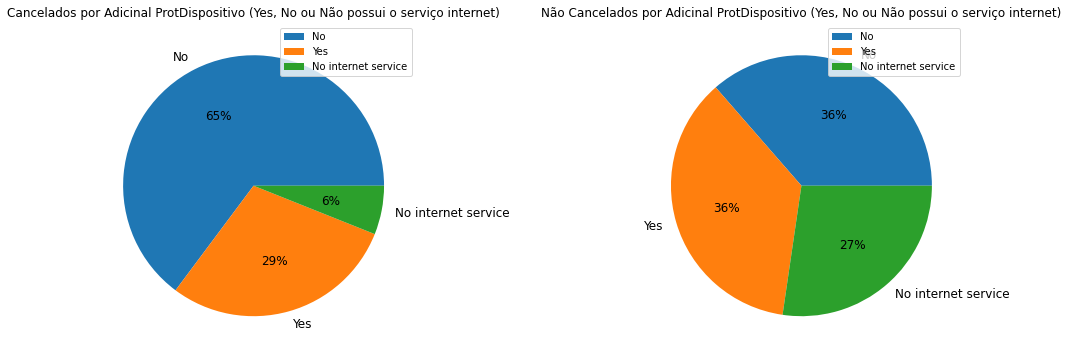

In [16]:
campo = 'AdicionalProtDispositivo'
# Analisando os dados Qualitativos, coluna Adicinal ProtDispositivo (Yes, No ou Não possui o serviço internet))
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Adicinal ProtDispositivo (Yes, No ou Não possui o serviço internet)')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Adicinal ProtDispositivo (Yes, No ou Não possui o serviço internet)')
plt.legend()

Explicação

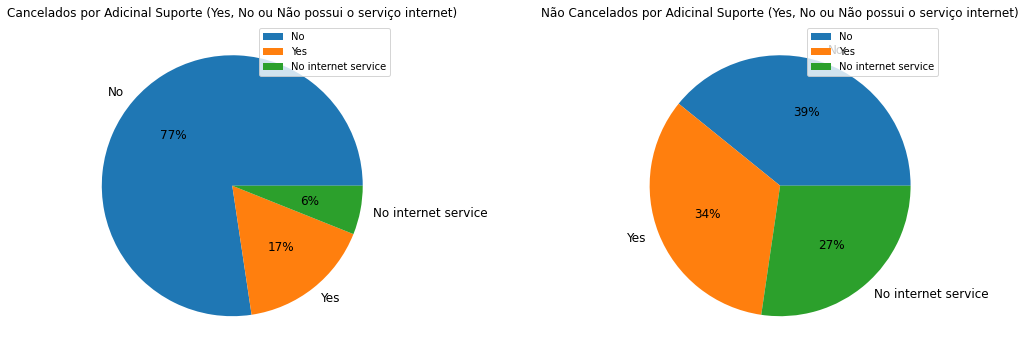

In [17]:
campo = 'AdicionalSuporte'
# Analisando os dados Qualitativos, coluna Adicinal Suporte (Yes, No ou Não possui o serviço internet))
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Adicinal Suporte (Yes, No ou Não possui o serviço internet)')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Adicinal Suporte (Yes, No ou Não possui o serviço internet)')
plt.legend()

Explicação

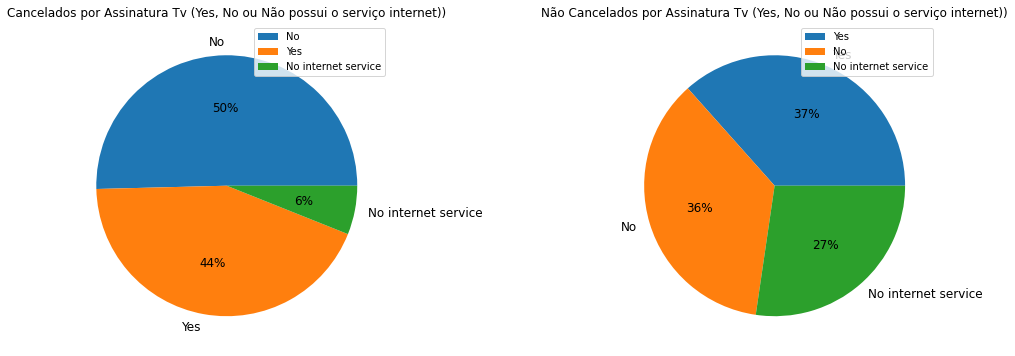

In [68]:
campo = 'AssinaturaTv'
# Analisando os dados Qualitativos, coluna Assinatura Tv (Yes, No ou Não possui o serviço internet))
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Assinatura Tv (Yes, No ou Não possui o serviço internet))')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Assinatura Tv (Yes, No ou Não possui o serviço internet))')
plt.legend()

Explicação

In [21]:
df_telco_customer.head(3)

Unnamed: 0   IdCliente ClienteCancelado  Genero Maior65 Parceiro(a)  \
0           0  0002-ORFBO               No  Female      No         Yes   
1           1  0003-MKNFE               No    Male      No          No   
2           2  0004-TLHLJ              Yes    Male      No          No   

  Dependentes  TempoContrato(m) ServiçoTelefônico MultiplasLinhas  ...  \
0         Yes                 9               Yes              No  ...   
1          No                 9               Yes             Yes  ...   
2          No                 4               Yes              No  ...   

  AdicionalProtDispositivo AdicionalSuporte AssinaturaTv AssinaturaFilmes  \
0                       No              Yes          Yes               No   
1                       No               No           No              Yes   
2                      Yes               No           No               No   

     TipoContrato FaturaDigital    FormaPagamento GastoMensal GastoTotal  \
0        One year           Yes      Mailed check        65.6     593.30   
1  Month-to-month            No      Mailed check        59.9     542.40   
2  Month-to-month           Yes  Electronic check        73.9     280.85   

  GastoDiarioMedio  
0         2.186667  
1         1.996667  
2         2.463333  

[3 rows x 23 columns]

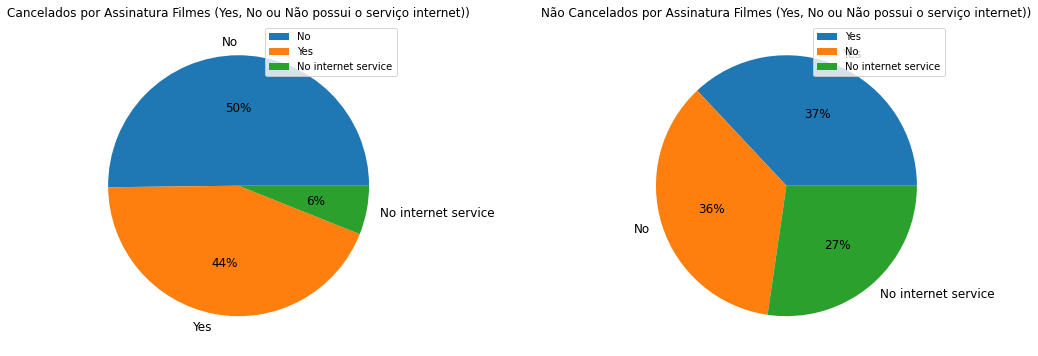

In [25]:
campo = 'AssinaturaFilmes'
# Analisando os dados Qualitativos, coluna Assinatura Filmes (Yes, No ou Não possui o serviço internet))
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Assinatura Filmes (Yes, No ou Não possui o serviço internet))')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Assinatura Filmes (Yes, No ou Não possui o serviço internet))')
plt.legend()


Explicação

Agora vou analisar as variáveis quantitativas dos Clientes para tentar encontrar alguma que nos ajude a entender os motivos dos cancelamentos:

Quantitativos:
- TempoContrato(m)          
- GastoMensal               
- GastoTotal                
- GastoDiarioMedio 


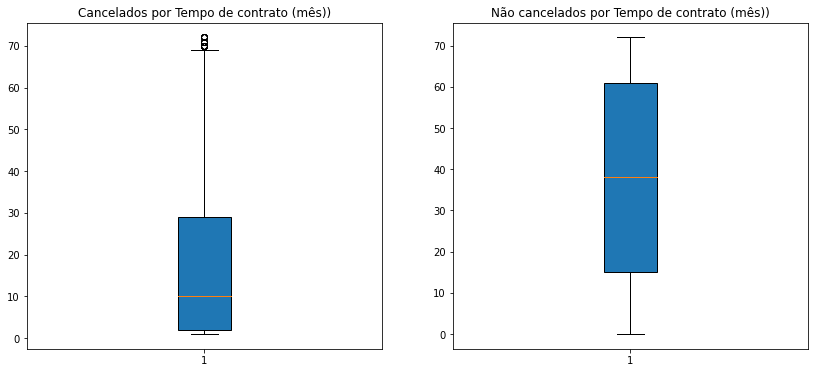

In [58]:
campo = 'TempoContrato(m)'
# Analisando os dados quantitativos, coluna Tempo de contrato em meses)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_telco_customer_churn[campo],  patch_artist = True )
plt.title('Cancelados por Tempo de contrato (mês))')

plt.subplot(1, 2, 2)
plt.boxplot(df_telco_customer_nao_churn[campo],  vert = 1, patch_artist = True) 
plt.title('Não cancelados por Tempo de contrato (mês))')
plt.show()

Explicação

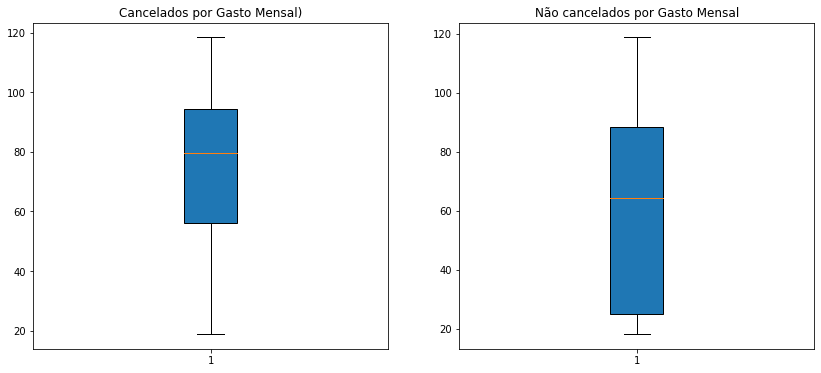

In [60]:
campo = 'GastoMensal'
# Analisando os dados quantitativos, coluna Gasto Mensal)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_telco_customer_churn[campo],  patch_artist = True )
plt.title('Cancelados por Gasto Mensal)')

plt.subplot(1, 2, 2)
plt.boxplot(df_telco_customer_nao_churn[campo],  vert = 1, patch_artist = True) 
plt.title('Não cancelados por Gasto Mensal')
plt.show()

Explicação

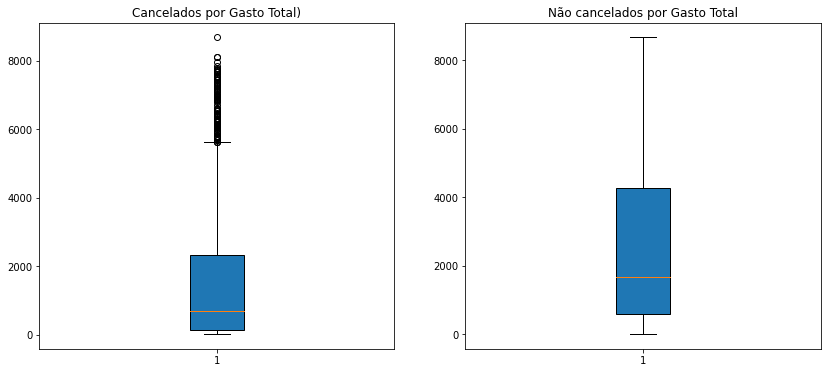

In [65]:
campo = 'GastoTotal'
# Analisando os dados quantitativos, coluna Gasto Total)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_telco_customer_churn[campo],  patch_artist = True )
plt.title('Cancelados por Gasto Total)')

plt.subplot(1, 2, 2)
plt.boxplot(df_telco_customer_nao_churn[campo],  vert = 1, patch_artist = True) 
plt.title('Não cancelados por Gasto Total')
plt.show()

Explicação

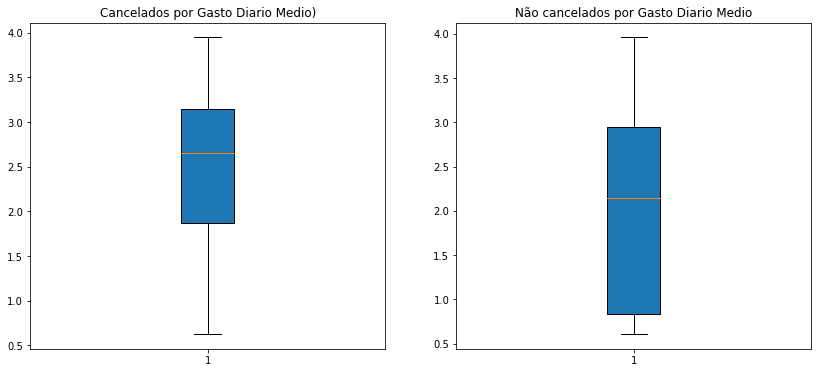

In [67]:
campo = 'GastoDiarioMedio'
# Analisando os dados quantitativos, coluna GastoDiarioMedio)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_telco_customer_churn[campo],  patch_artist = True )
plt.title('Cancelados por Gasto Diario Medio)')

plt.subplot(1, 2, 2)
plt.boxplot(df_telco_customer_nao_churn[campo],  vert = 1, patch_artist = True) 
plt.title('Não cancelados por Gasto Diario Medio')
plt.show()